<a href="https://colab.research.google.com/github/julioferreirah/Inteligencia-Artificial/blob/main/TrabalhoIA_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Inteligência Artificial - Implementação de MLP

 ### Importando Bibliotecas


In [6]:
import numpy as np
import time as t
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Modelo

### Modelo sem parada antecipada

In [8]:
# Função de ativação tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Função de perda - Erro Quadrático Médio
def erro_quadratico(y_dado, y_predito):
    return np.mean((y_dado - y_predito) ** 2)

class MLP:
    def __init__(self, tamanho_entrada, tamanho_escondida, tamanho_saida):
        # Inicialização dos pesos
        self.W1 = np.random.randn(tamanho_entrada, tamanho_escondida)
        self.b1 = np.zeros((1, tamanho_escondida))
        self.W2 = np.random.randn(tamanho_escondida, tamanho_saida)
        self.b2 = np.zeros((1, tamanho_saida))

    def feedforward(self, X):
        # Camada oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = tanh(self.z1)

        # Camada de saída
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)

        return self.a2

    def backpropagation(self, X, y, y_predito, taxa_aprendizado):
        # Gradiente da camada de saída
        delta2 = (y_predito - y) * (1 - tanh(self.z2) ** 2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = delta2.sum(axis=0, keepdims=True)

        # Gradiente da camada oculta
        delta1 = np.dot(delta2, self.W2.T) * (1 - tanh(self.z1) ** 2)
        dW1 = np.dot(X.T, delta1)
        db1 = delta1.sum(axis=0)

        # Atualização dos pesos
        self.W2 -= taxa_aprendizado * dW2
        self.b2 -= taxa_aprendizado * db2
        self.W1 -= taxa_aprendizado * dW1
        self.b1 -= taxa_aprendizado * db1

    def train(self, X, y, epochs, taxa_aprendizado):
        v = []
        for  i in range(epochs) :
            # Feedforward
            y_predito = self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, y_predito, taxa_aprendizado)

            # Cálculo do erro
            loss = erro_quadratico(y, y_predito)

            #registra erro pro plot
            v.append(loss)

            # condição parada - erro
            if float(loss) < 0.005:
              print("Para por minimização de erro")
              break

            # condição parada - aprendizagem
            if i % 100 == 0:
              taxa_aprendizado = taxa_aprendizado*0.99
            if float(taxa_aprendizado) < 0.001:
              print("Para por taxa de aprendizado muito baixa")
              break


        #quando parou
        print("Parada na época ", i +1)
        print("Taxa de aprendizado ", taxa_aprendizado)

        #plot do erro
        plt.plot(range(0, i+1), v)
        plt.xlabel('Épocas')
        plt.ylabel('Erro Quadrático Médio')
        plt.title('Histórico de Erro durante o Treinamento')
        plt.show()


### Modelo com parada antecipada

In [14]:
# Função de ativação tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Função de perda - Erro Quadrático Médio
def erro_quadratico(y_dado, y_predito):
    return np.mean((y_dado - y_predito) ** 2)

class MLPpa:
    def __init__(self, tamanho_entrada, tamanho_escondida, tamanho_saida):
        # Inicialização dos pesos
        self.W1 = np.random.randn(tamanho_entrada, tamanho_escondida)
        self.b1 = np.zeros((1, tamanho_escondida))
        self.W2 = np.random.randn(tamanho_escondida, tamanho_saida)
        self.b2 = np.zeros((1, tamanho_saida))

    def feedforward(self, X):
        # Camada oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = tanh(self.z1)

        # Camada de saída
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)

        return self.a2

    def backpropagation(self, X, y, y_predito, taxa_aprendizado):
        # Gradiente da camada de saída
        delta2 = (y_predito - y) * (1 - tanh(self.z2) ** 2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = delta2.sum(axis=0, keepdims=True)

        # Gradiente da camada oculta
        delta1 = np.dot(delta2, self.W2.T) * (1 - tanh(self.z1) ** 2)
        dW1 = np.dot(X.T, delta1)
        db1 = delta1.sum(axis=0)

        # Atualização dos pesos
        self.W2 -= taxa_aprendizado * dW2
        self.b2 -= taxa_aprendizado * db2
        self.W1 -= taxa_aprendizado * dW1
        self.b1 -= taxa_aprendizado * db1

    def train(self, X, y, epochs, taxa_aprendizado, X_validacao, y_validacao):
        v_treino = []
        v_validacao = []
        paciencia = 0
        dif = 0

        for i in range(epochs):
            # Feedforward
            y_predito = self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, y_predito, taxa_aprendizado)

            # Cálculo do erro
            loss_treino = erro_quadratico(y, y_predito)
            loss_validacao = erro_quadratico(y_validacao, self.feedforward(X_validacao))

            # Calculo da diferença entre validacao e treino + atualização da paciencia
            difn = loss_validacao - loss_treino
            if difn > dif and difn > 0:
                paciencia += 1
            else:
                paciencia = 0
            dif = difn

            # Condição de parada antecipada - diferença aumentou por 50 vezes seguidas
            if paciencia >= 50:
                print("Parada antecipada")
                break

            # Registro dos erros para o plot
            v_treino.append(loss_treino)
            v_validacao.append(loss_validacao)

            # condição parada - erro
            if float(loss_treino) < 0.005:
              print("Para por minimização de erro")
              i +=1
              break

            # condição parada - aprendizagem
            if i % 100 == 0:
              taxa_aprendizado = taxa_aprendizado*0.99
            if float(taxa_aprendizado) < 0.001:
              print("Para por taxa de aprendizado muito baixa")
              i +=1
              break

        # Quando parou
        print("Parada na época", i )
        print("Taxa de aprendizado", taxa_aprendizado)

        # Plot do erro de treinamento e validação
        plt.plot(range(0, i), v_treino, label='Treinamento')
        plt.plot(range(0, i ), v_validacao, label='Validação')
        plt.xlabel('Épocas')
        plt.ylabel('Erro Quadrático Médio')
        plt.title('Histórico de Erro durante o Treinamento')
        plt.legend()
        plt.show()


#Aplicação do Modelo

## Portas Lógicas

###Problema do AND

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemAND.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)


In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 1, tamanho_saida = 1)
print(model.train(X= X,y= y, epochs= 100, taxa_aprendizado= 0.1))

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))


###Problema do OR

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemOR.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)


In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 1, tamanho_saida = 1)
print(model.train(X= X,y= y, epochs= 100, taxa_aprendizado= 0.1))

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))


###Problema do XOR

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemXOR.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)

# Verificando as dimensões
print("Dimensões de X:", X.shape)
print("Dimensões de y:", y.shape)


In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 3, tamanho_saida = 1)
model.train(X= X,y= y, epochs= 500, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))
print("Erro médio de teste: %.2f" %(np.mean(abs(y - a))*100) + "%")

## Caracteres

### Sem Validação Cruzada

#### Sem Parada Antecipada

##### Sem ruído

In [20]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste - 10%
num_amostras_teste = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_treino = indices_embaralhados[num_amostras_teste:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_teste = y[indices_teste]
y_teste

array([[-1, -1, -1, -1, -1, -1,  1],
       [-1,  1, -1, -1, -1, -1, -1]])

In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 63, tamanho_escondida = 18, tamanho_saida = 7) #promissores: 13, 18, 23
model.train(X= X_treino,y= y_treino, epochs= 50000, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


##### Com ruido 1

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-ruido.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste - 10%
num_amostras_teste = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_treino = indices_embaralhados[num_amostras_teste:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_teste = y[indices_teste]
y_teste

array([[-1, -1, -1, -1, -1,  1, -1],
       [-1,  1, -1, -1, -1, -1, -1]])

In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 63, tamanho_escondida = 18, tamanho_saida = 7) #promissores: 13, 18, 23
model.train(X= X_treino,y= y_treino, epochs= 50000, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


##### Com ruido 2

In [360]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres_ruido20.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste - 10%
num_amostras_teste = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_treino = indices_embaralhados[num_amostras_teste:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_teste = y[indices_teste]
y_teste

array([[-1, -1, -1, -1, -1,  1, -1],
       [-1,  1, -1, -1, -1, -1, -1]])

Para por taxa de aprendizado muito baixa
Parada na época  45801
Taxa de aprendizado  0.0009920974201040604


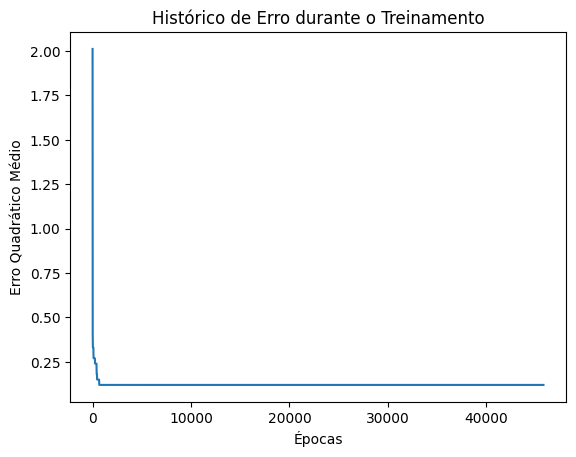

[[-1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
Erro teste: 41.83%


In [361]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 63, tamanho_escondida = 18, tamanho_saida = 7) #promissores: 13, 18, 23
model.train(X= X_treino,y= y_treino, epochs= 50000, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


#### Com Parada Antecipada

##### Sem ruído

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste e validacao - 10% cada
num_amostras_teste = int(X.shape[0] * 0.1)
num_amostras_validacao = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_validacao = indices_embaralhados[num_amostras_teste:num_amostras_teste+num_amostras_validacao] # Selecionar os índices para o conjunto de validação
indices_treino = indices_embaralhados[num_amostras_teste+num_amostras_validacao:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_validacao = X[indices_validacao]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_validacao = y[indices_validacao]
y_teste = y[indices_teste]
y_teste

In [ ]:

# Treinamento do modelo
model = MLPpa(tamanho_entrada = 63, tamanho_escondida = 29, tamanho_saida = 7) #promissores: 14,17,19, 29
model.train(X_treino, y_treino, epochs=50000, taxa_aprendizado=0.1, X_validacao=X_validacao, y_validacao=y_validacao)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


##### Com ruído 1

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-ruido.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste e validacao - 10% cada
num_amostras_teste = int(X.shape[0] * 0.1)
num_amostras_validacao = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_validacao = indices_embaralhados[num_amostras_teste:num_amostras_teste+num_amostras_validacao] # Selecionar os índices para o conjunto de validação
indices_treino = indices_embaralhados[num_amostras_teste+num_amostras_validacao:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_validacao = X[indices_validacao]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_validacao = y[indices_validacao]
y_teste = y[indices_teste]
y_teste

In [ ]:

# Treinamento do modelo
model = MLPpa(tamanho_entrada = 63, tamanho_escondida = 29, tamanho_saida = 7) #promissores: 14,17,19, 29
model.train(X_treino, y_treino, epochs=50000, taxa_aprendizado=0.1, X_validacao=X_validacao, y_validacao=y_validacao)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


##### Com ruído 2

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres_ruido20.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste e validacao - 10% cada
num_amostras_teste = int(X.shape[0] * 0.1)
num_amostras_validacao = int(X.shape[0] * 0.1)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_validacao = indices_embaralhados[num_amostras_teste:num_amostras_teste+num_amostras_validacao] # Selecionar os índices para o conjunto de validação
indices_treino = indices_embaralhados[num_amostras_teste+num_amostras_validacao:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_validacao = X[indices_validacao]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_validacao = y[indices_validacao]
y_teste = y[indices_teste]
y_teste

In [ ]:

# Treinamento do modelo
model = MLPpa(tamanho_entrada = 63, tamanho_escondida = 29, tamanho_saida = 7) #promissores: 14,17,19, 29
model.train(X_treino, y_treino, epochs=50000, taxa_aprendizado=0.1, X_validacao=X_validacao, y_validacao=y_validacao)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


##### Experimento: juntando tudo

In [363]:
# Importando arquivos
df1 = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)
df2 = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-ruido.csv", header=None)
df3 = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres_ruido20.csv", header=None)
df = pd.concat([df1, df2, df3])

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

# Separando conjunto de teste e validacao - 70/20/10
num_amostras_teste = int(X.shape[0] * 0.1)
num_amostras_validacao = int(X.shape[0] * 0.2)
indices_embaralhados = np.random.permutation(X.shape[0]) # Embaralhar os índices das amostras
indices_teste = indices_embaralhados[:num_amostras_teste] # Selecionar os índices para o conjunto de teste
indices_validacao = indices_embaralhados[num_amostras_teste:num_amostras_teste+num_amostras_validacao] # Selecionar os índices para o conjunto de validação
indices_treino = indices_embaralhados[num_amostras_teste+num_amostras_validacao:] # Selecionar os índices para o conjunto de treinamento

# Dividir os dados em conjuntos de treinamento e teste
X_treino = X[indices_treino]
X_validacao = X[indices_validacao]
X_teste = X[indices_teste]
y_treino = y[indices_treino]
y_validacao = y[indices_validacao]
y_teste = y[indices_teste]
y_teste

array([[-1, -1, -1, -1, -1, -1,  1],
       [-1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1]])

Parada antecipada
Parada na época 98
Taxa de aprendizado 0.099


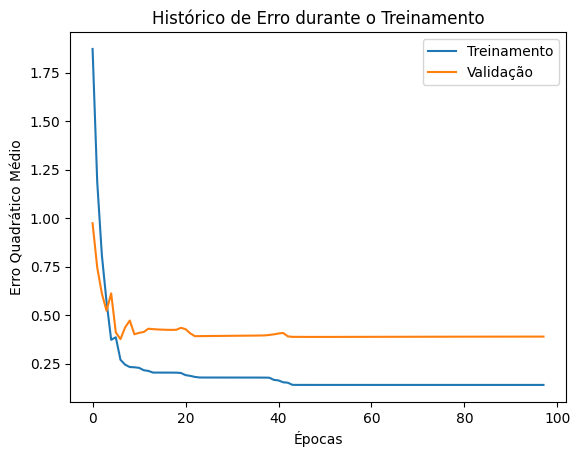

[[-1. -1. -1. -1. -1. -1.  1.]
 [-1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -0. -1.  0. -1. -1.]]
Erro teste: 8.08%


In [373]:

# Treinamento do modelo
model = MLPpa(tamanho_entrada = 63, tamanho_escondida = 25, tamanho_saida = 7) #promissores: 17,25,26,27
model.train(X_treino, y_treino, epochs=50000, taxa_aprendizado=0.1, X_validacao=X_validacao, y_validacao=y_validacao)

# Chamada da execucao do algoritmo treinado
res = model.feedforward(X_teste)
resp = np.round(res)
print(resp)
print("Erro teste: %.2f" %(np.mean(abs(y_teste - res))*100) + "%")


### Com Validação Cruzada

#### Sem Parada Antecipada

##### Sem ruído

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Treinamento do modelo
    model = MLP(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino, y=y_treino, epochs=50000, taxa_aprendizado=0.1)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")


##### Com ruido 1

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-ruido.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Treinamento do modelo
    model = MLP(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino, y=y_treino, epochs=50000, taxa_aprendizado=0.1)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")


##### Com ruido 2

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres_ruido20.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Treinamento do modelo
    model = MLP(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino, y=y_treino, epochs=50000, taxa_aprendizado=0.1)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")

#### Com Parada Antecipada

##### Sem ruído

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Dividir o conjunto de treinamento em treinamento e validação
    num_amostras_validacao = int(X_treino.shape[0] * 0.1)
    indices_embaralhados_treino = np.random.permutation(X_treino.shape[0])
    indices_validacao = indices_embaralhados_treino[:num_amostras_validacao]
    indices_treino = indices_embaralhados_treino[num_amostras_validacao:]
    X_treino_final = X_treino[indices_treino]
    X_validacao = X_treino[indices_validacao]
    y_treino_final = y_treino[indices_treino]
    y_validacao = y_treino[indices_validacao]

    # Treinamento do modelo
    model = MLPpa(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino_final, y=y_treino_final, epochs=50000, taxa_aprendizado=0.1,X_validacao=X_validacao, y_validacao=y_validacao)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")


##### Com ruido 1

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-ruido.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Dividir o conjunto de treinamento em treinamento e validação
    num_amostras_validacao = int(X_treino.shape[0] * 0.1)
    indices_embaralhados_treino = np.random.permutation(X_treino.shape[0])
    indices_validacao = indices_embaralhados_treino[:num_amostras_validacao]
    indices_treino = indices_embaralhados_treino[num_amostras_validacao:]
    X_treino_final = X_treino[indices_treino]
    X_validacao = X_treino[indices_validacao]
    y_treino_final = y_treino[indices_treino]
    y_validacao = y_treino[indices_validacao]

    # Treinamento do modelo
    model = MLPpa(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino_final, y=y_treino_final, epochs=50000, taxa_aprendizado=0.1,X_validacao=X_validacao, y_validacao=y_validacao)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")


##### Com ruido 2

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres_ruido20.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta

num_folds = 5 # Definindo o número de folds
fold_size = len(X) // num_folds # Calculando o tamanho do fold
resultados = [] # Inicializando a lista para armazenar os resultados

# Realizando a validação cruzada
for i in range(num_folds):
    # Definindo os índices para o fold atual
    start = i * fold_size
    end = (i + 1) * fold_size

    # Dividindo os dados em treinamento e teste
    X_treino = np.concatenate((X[:start], X[end:]), axis=0)
    y_treino = np.concatenate((y[:start], y[end:]), axis=0)
    X_teste = X[start:end]
    y_teste = y[start:end]

    # Dividir o conjunto de treinamento em treinamento e validação
    num_amostras_validacao = int(X_treino.shape[0] * 0.1)
    indices_embaralhados_treino = np.random.permutation(X_treino.shape[0])
    indices_validacao = indices_embaralhados_treino[:num_amostras_validacao]
    indices_treino = indices_embaralhados_treino[num_amostras_validacao:]
    X_treino_final = X_treino[indices_treino]
    X_validacao = X_treino[indices_validacao]
    y_treino_final = y_treino[indices_treino]
    y_validacao = y_treino[indices_validacao]

    # Treinamento do modelo
    model = MLPpa(tamanho_entrada=63, tamanho_escondida=18, tamanho_saida=7)
    model.train(X=X_treino_final, y=y_treino_final, epochs=50000, taxa_aprendizado=0.1,X_validacao=X_validacao, y_validacao=y_validacao)

    # Chamada da execução do algoritmo treinado no conjunto de validação
    res = model.feedforward(X_teste)
    resp = np.round(res)

    # Calculando o erro no conjunto de validação
    erro = np.mean(abs(y_teste - res))

    # Armazenando o resultado
    resultados.append(erro)

# Calculando a média dos erros de validação
media_erro = np.mean(resultados)

# Exibindo o resultado
print("Erro médio de teste: %.2f" % (media_erro * 100) + "%")